## Comparing Growth (Total Return) : Indices Market 

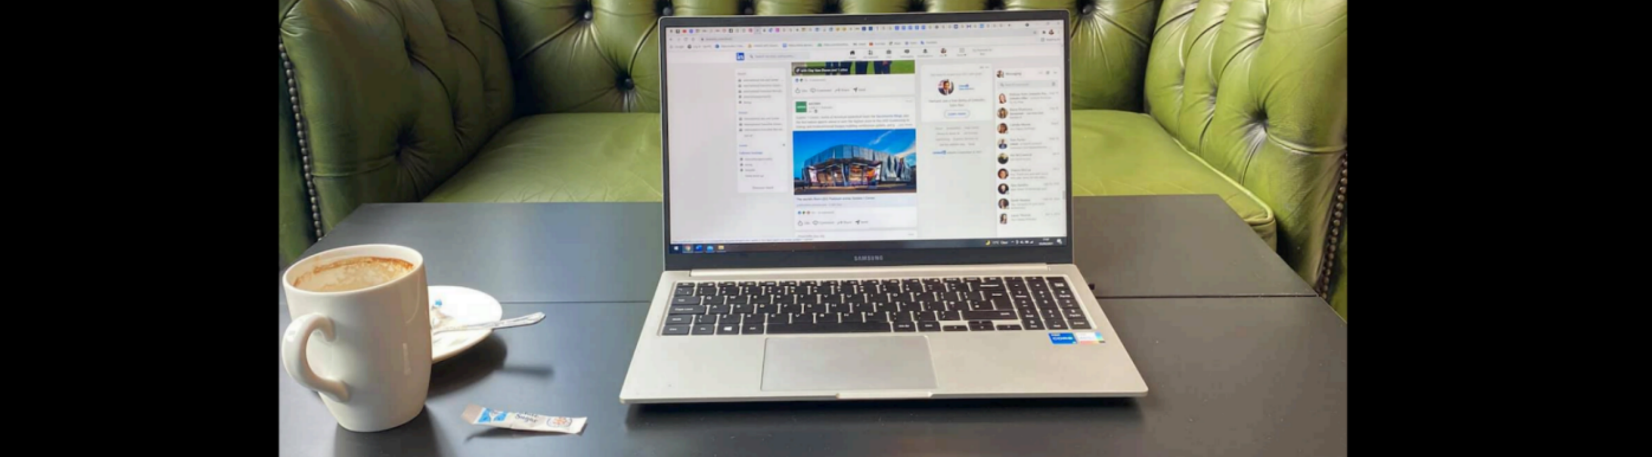

## Hemant Thapa

### 1. Loading Libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

### 2. Selecting Indices

In [2]:
indices = ['^GSPC', '^IXIC', '^DJI', '^FTSE', '^N225', '^HSI', '^BSESN', '^GDAXI', '^FCHI','^BVSP', '^XAX', '^MXX', '^AORD']

- S&P 500 (United States): `^GSPC`
- NASDAQ Composite (United States): `^IXIC`
- Dow Jones Industrial Average (United States): `^DJI`
- FTSE 100 (United Kingdom): `^FTSE`
- Nikkei 225 (Japan): `^N225`
- Hang Seng Index (Hong Kong): `^HSI`
- BSE Sensex (India): `^BSESN`
- DAX (Germany): `^GDAXI`
- CAC 40 (France): `^FCHI`
- Bovespa (Brazil): `^BVSP`
- S&P 500 Index (American stock market): `^XAX`
- IPC (Mexico): `^MXX`
- S&P/ASX 200 (Australia): `^AORD`


### 3. Data Mining 

In [3]:
#function to download 
def download_indices(ticker):
    return yf.download(ticker, period='3Y')['Adj Close']

In [4]:
#creating data frame for closing prices 
indices_list = pd.DataFrame()

In [5]:
for i in indices:
    indices_list[i] = download_indices(i)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


### 4. Pre Procesing 

In [6]:
#data types
indices_list.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 755 entries, 2020-12-30 to 2023-12-29
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ^GSPC   755 non-null    float64
 1   ^IXIC   755 non-null    float64
 2   ^DJI    755 non-null    float64
 3   ^FTSE   737 non-null    float64
 4   ^N225   711 non-null    float64
 5   ^HSI    718 non-null    float64
 6   ^BSESN  718 non-null    float64
 7   ^GDAXI  747 non-null    float64
 8   ^FCHI   750 non-null    float64
 9   ^BVSP   726 non-null    float64
 10  ^XAX    755 non-null    float64
 11  ^MXX    735 non-null    float64
 12  ^AORD   738 non-null    float64
dtypes: float64(13)
memory usage: 82.6 KB


In [7]:
#rows and columns
indices_list.shape

(755, 13)

In [8]:
#total data in dataframe
indices_list.size

9815

In [9]:
#checking missing values
indices_list.isnull().sum()

^GSPC      0
^IXIC      0
^DJI       0
^FTSE     18
^N225     44
^HSI      37
^BSESN    37
^GDAXI     8
^FCHI      5
^BVSP     29
^XAX       0
^MXX      20
^AORD     17
dtype: int64

In [10]:
#removing missing vlaues
indices_list.dropna(inplace=True)

In [11]:
#rows and columns after cleaning dataset
indices_list.shape

(592, 13)

In [12]:
#checking total data after cleaning ~dataframe
indices_list.size

7696

In [13]:
indices_list[:5]

,^GSPC,^IXIC,^DJI,^FTSE,^N225,^HSI,^BSESN,^GDAXI,^FCHI,^BVSP,^XAX,^MXX,^AORD
Date,,,,,,,,,,,,,
2020-12-30,3732.040039,12870.000000,30409.560547,6555.799805,27444.169922,27147.109375,47746.218750,13718.780273,5599.410156,119306.0,2382.590088,44693.960938,6942.899902
2021-01-04,3700.649902,12698.450195,30223.890625,6571.899902,27258.380859,27472.810547,48176.800781,13726.740234,5588.959961,118558.0,2368.949951,44703.000000,6953.700195
2021-01-05,3726.860107,12818.959961,30391.599609,6612.299805,27158.630859,27649.859375,48437.781250,13651.219727,5564.600098,119223.0,2462.979980,44908.121094,6955.700195
2021-01-06,3748.139893,12740.790039,30829.400391,6841.899902,27055.939453,27692.300781,48174.058594,13891.969727,5630.600098,119851.0,2504.080078,45587.160156,6881.399902
2021-01-07,3803.790039,13067.480469,31041.130859,6857.000000,27490.130859,27548.519531,48093.320312,13968.240234,5669.850098,121956.0,2536.100098,46188.660156,6980.500000


### 5. Percentage Growth 

In [14]:
#calculating total growth of overall indices
percentage_growth = (indices_list.iloc[-1] - indices_list.iloc[0]) / indices_list.iloc[0] * 100

In [15]:
print(percentage_growth)

^GSPC     28.169849
^IXIC     17.289352
^DJI      24.007387
^FTSE     17.799512
^N225     22.210368
^HSI     -37.217885
^BSESN    51.656790
^GDAXI    21.742243
^FCHI     34.570606
^BVSP     12.471292
^XAX      92.339838
^MXX      28.573124
^AORD     13.095395
dtype: float64


In [16]:
best_performing_index = percentage_growth.idxmax()
best_growth_percentage = percentage_growth.max()

In [17]:
print(f"The best-performing index over the past 3 years is {best_performing_index} with a growth of {best_growth_percentage:.2f}%.")

The best-performing index over the past 3 years is ^XAX with a growth of 92.34%.


### 6. Comparing Indicies Growth Over Time

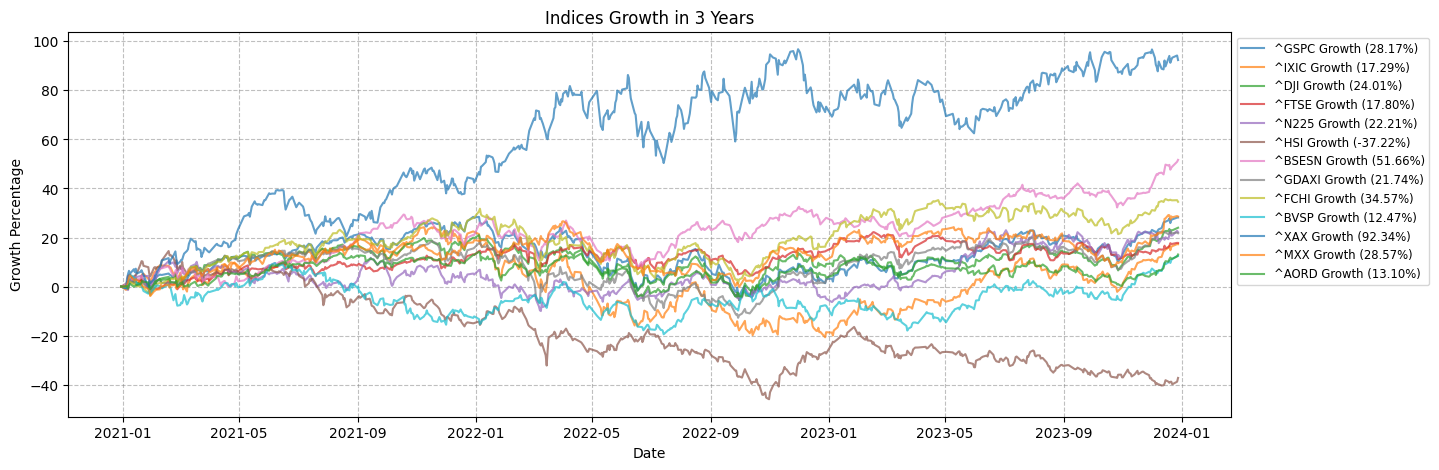

In [18]:
plt.figure(figsize=(15, 5))
for i in indices_list:
    growth_percentage = (indices_list[i] / indices_list[i].iloc[0] - 1) * 100
    plt.plot(indices_list.index, growth_percentage, label=f'{i} Growth ({growth_percentage.iloc[-1]:.2f}%)', alpha=0.7)

plt.xlabel('Date')
plt.ylabel('Growth Percentage')
plt.title('Indices Growth in 3 Years')
plt.grid(True, ls='--', alpha=0.5, color='grey')
plt.legend(loc='upper left', fontsize='small', bbox_to_anchor=(1, 1))
plt.show()

### 7. Comparing Growth in Bar Chart

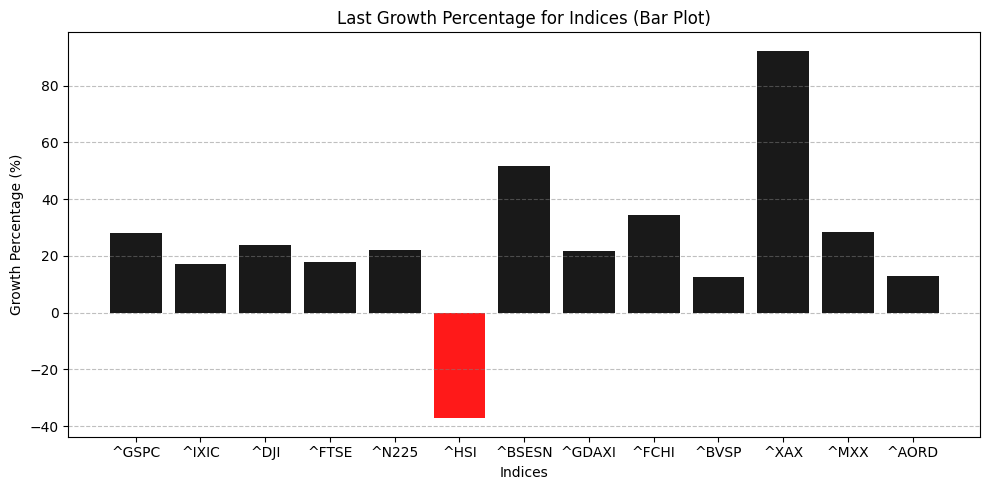

In [19]:
plt.figure(figsize=(10, 5))
index_names = list(indices_list.keys())
last_growth_percentages = [(indices_list[index_name].iloc[-1] / indices_list[index_name].iloc[0] - 1) * 100 for index_name in index_names]
colors = ['red' if growth < 0 else 'black' for growth in last_growth_percentages]
plt.bar(index_names, last_growth_percentages, color=colors, alpha=0.9)
plt.xlabel('Indices')
plt.ylabel('Growth Percentage (%)')
plt.title('Last Growth Percentage for Indices (Bar Plot)')
plt.grid(axis='y', linestyle='--', alpha=0.5, color='grey')
plt.tight_layout() 
plt.show()

### 8. Average Cumulative Growth

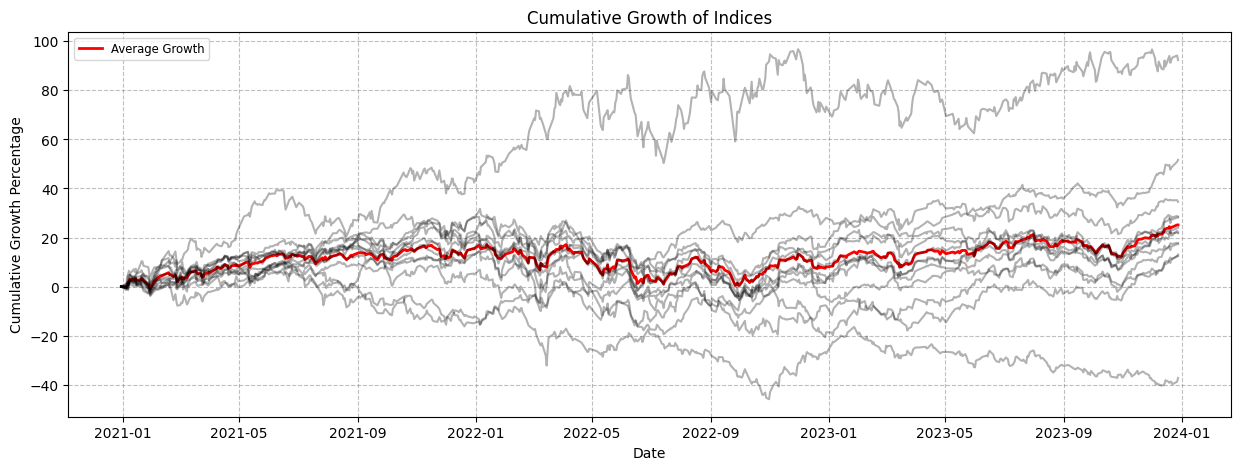

In [20]:
cumulative_growth = (indices_list / indices_list.iloc[0] - 1) * 100

average_growth = cumulative_growth.mean(axis=1)
plt.figure(figsize=(15, 5))

plt.plot(indices_list.index, average_growth, color='red', linewidth=2)
for column in indices_list.columns:
    if column != 'Average Growth':
        plt.plot(indices_list.index, cumulative_growth[column], alpha=0.3, color='black')

plt.xlabel('Date')
plt.ylabel('Cumulative Growth Percentage')
plt.title('Cumulative Growth of Indices')
plt.grid(True, ls='--', alpha=0.5, color='grey')
plt.legend(['Average Growth'], loc='upper left', fontsize='small')
plt.show()

In [21]:
average_growth_value = average_growth.iloc[-1] 
print(f'Average Growth: {average_growth_value:.2f}%')

Average Growth: 25.13%


In [22]:
cumulative_growth = (indices_list / indices_list.iloc[0] - 1) * 100
average_growth = cumulative_growth.mean(axis=1)

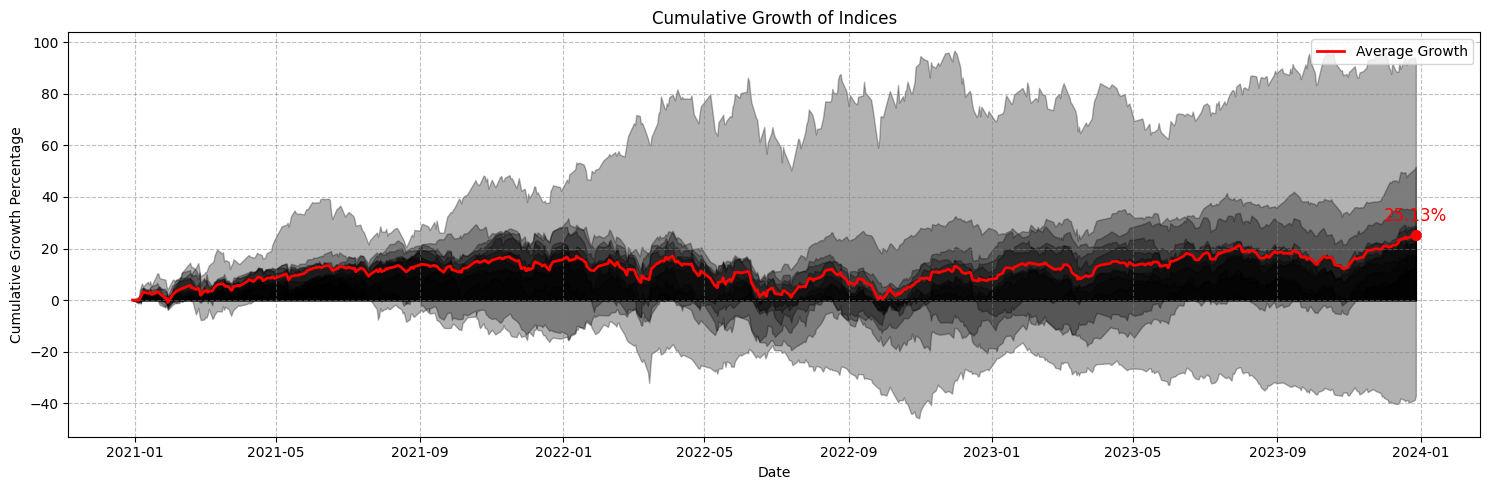

In [23]:
plt.figure(figsize=(15, 5))
for column in indices_list.columns:
    if column != 'Average Growth':
        plt.fill_between(indices_list.index, 0, cumulative_growth[column], alpha=0.3, color='black')
plt.plot(indices_list.index, average_growth, color='red', linewidth=2, label='Average Growth')
plt.scatter(indices_list.index[-1], average_growth[-1], color='red', linewidth=2)
plt.annotate(f'{average_growth[-1]:.2f}%',  (indices_list.index[-1], average_growth[-1]), textcoords='offset points', xytext=(0,10), ha='center', color='red', fontsize=12)
plt.xlabel('Date')
plt.ylabel('Cumulative Growth Percentage')
plt.title('Cumulative Growth of Indices')
plt.grid(True, linestyle='--', alpha=0.5, color='grey')
plt.legend(fontsize='small', loc='upper left')
plt.tight_layout()
legend = plt.legend()
for line, label in zip(legend.get_lines(), legend.get_texts()):
    label.set_text(label.get_text().replace('_', ' ').title())
plt.show()

### 9. Daily Return Histogram

In [24]:
daily_returns = indices_list.pct_change().dropna()
daily_returns[:5]

,^GSPC,^IXIC,^DJI,^FTSE,^N225,^HSI,^BSESN,^GDAXI,^FCHI,^BVSP,^XAX,^MXX,^AORD
Date,,,,,,,,,,,,,
2021-01-04,-0.008411,-0.013329,-0.006106,0.002456,-0.006770,0.011998,0.009018,0.000580,-0.001866,-0.006270,-0.005725,0.000202,0.001556
2021-01-05,0.007083,0.009490,0.005549,0.006147,-0.003659,0.006445,0.005417,-0.005502,-0.004359,0.005609,0.039693,0.004589,0.000288
2021-01-06,0.005710,-0.006098,0.014405,0.034723,-0.003781,0.001535,-0.005445,0.017636,0.011861,0.005267,0.016687,0.015121,-0.010682
2021-01-07,0.014847,0.025641,0.006868,0.002207,0.016048,-0.005192,-0.001676,0.005490,0.006971,0.017563,0.012787,0.013195,0.014401
2021-01-08,0.005492,0.010293,0.001831,0.002377,0.023605,0.011968,0.014330,0.005820,0.006531,0.025591,-0.011190,0.011705,0.006260


In [25]:
mean_value = daily_returns.mean().mean()
median_value = daily_returns.median().median()
max_value = daily_returns.max().max()

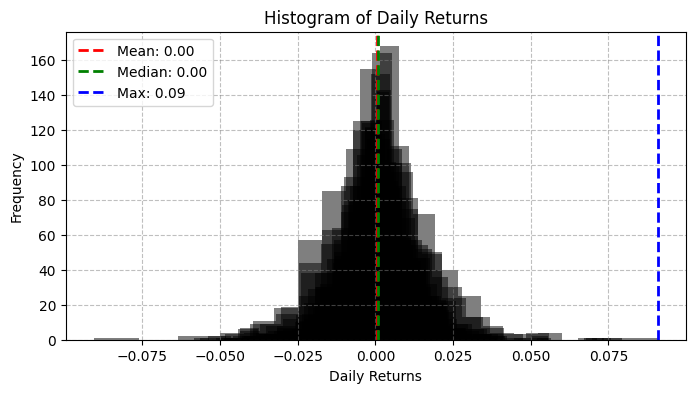

In [26]:
plt.figure(figsize=(8, 4))
for column in daily_returns.columns:
    plt.hist(daily_returns[column], bins=20, alpha=0.5, color='black')
    
plt.axvline(mean_value, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_value:.2f}')
plt.axvline(median_value, color='green', linestyle='dashed', linewidth=2, label=f'Median: {median_value:.2f}')
plt.axvline(max_value, color='blue', linestyle='dashed', linewidth=2, label=f'Max: {max_value:.2f}')
plt.xlabel('Daily Returns')
plt.ylabel('Frequency')
plt.title('Histogram of Daily Returns')
plt.grid(True, ls='--', alpha=0.5, color='grey')
plt.legend()
plt.show()

### 10. Drawdowns

In [27]:
#drawdowns
cumulative_growth = (indices_list / indices_list.iloc[0] - 1) * 100
drawdowns = (cumulative_growth - cumulative_growth.cummax()) / 100

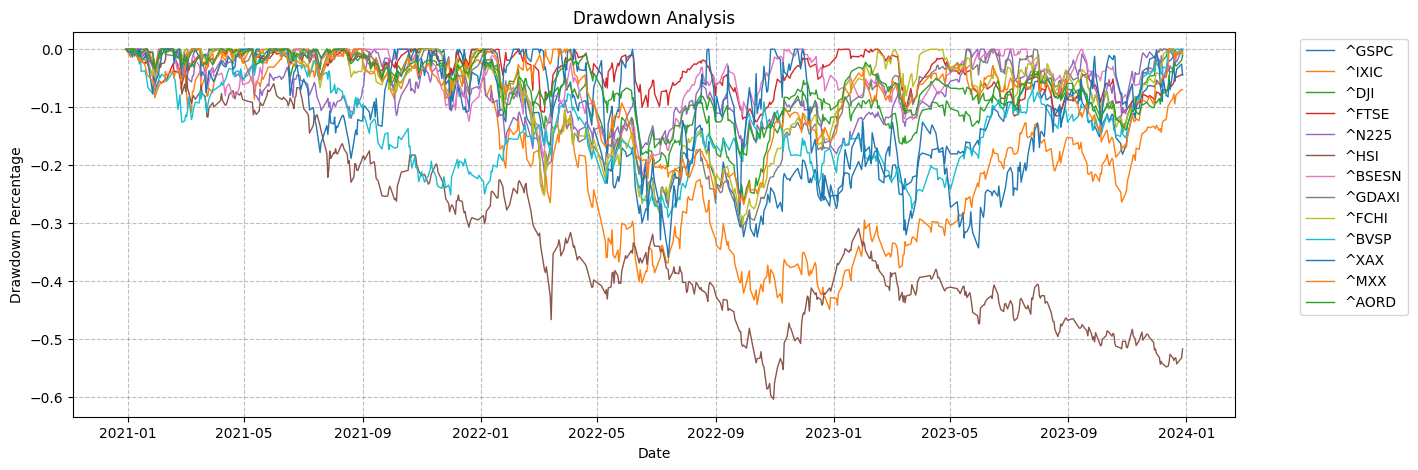

In [28]:
plt.figure(figsize=(15, 5))
for column in drawdowns.columns:
    plt.plot(indices_list.index, drawdowns[column], label=column, lw=1)
plt.xlabel('Date')
plt.ylabel('Drawdown Percentage')
plt.title('Drawdown Analysis')
plt.grid(True, ls='--', alpha=0.5, color='grey')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

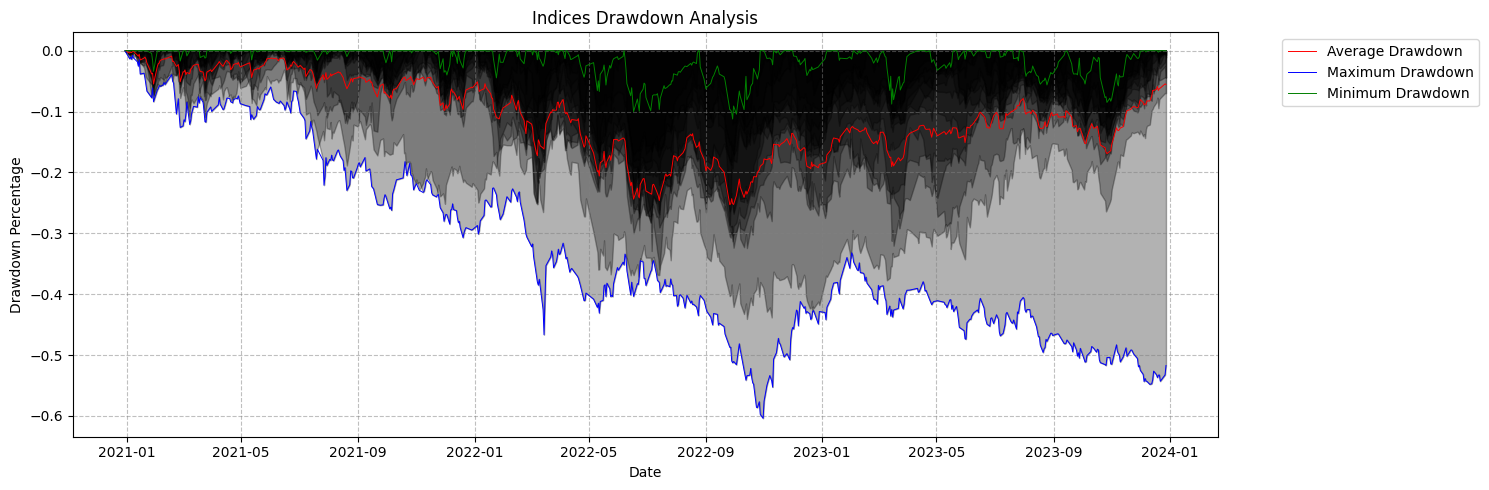

In [29]:
plt.figure(figsize=(15, 5))
for column in drawdowns.columns:
    plt.fill_between(indices_list.index,0,drawdowns[column], alpha=0.3, color='black')

average_drawdown = drawdowns.mean(axis=1)
maximum_drawdown = drawdowns.min(axis=1)
minimum_drawdown = drawdowns.max(axis=1)

plt.plot(indices_list.index,average_drawdown,color='red',linewidth=0.7,label='Average Drawdown')
plt.plot(indices_list.index,maximum_drawdown,color='blue',linewidth=0.7,label='Maximum Drawdown')
plt.plot(indices_list.index,minimum_drawdown,color='green',linewidth=0.7,label='Minimum Drawdown')
plt.xlabel('Date')

plt.ylabel('Drawdown Percentage')
plt.title('Indices Drawdown Analysis')
plt.grid(True, linestyle='--', alpha=0.5, color='grey')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [30]:
#drawdown statistics
print(f'\nDrawdown Statistics:')
for column in drawdowns.columns:
    max_drawdown = drawdowns[column].min()
    recovery_time = drawdowns[column][drawdowns[column] == max_drawdown].index[0]
    print(f'{column}: Max Drawdown: {max_drawdown:.2f}%, Recovery Time: {recovery_time}')


Drawdown Statistics:
^GSPC: Max Drawdown: -0.32%, Recovery Time: 2022-10-14 00:00:00
^IXIC: Max Drawdown: -0.45%, Recovery Time: 2022-12-28 00:00:00
^DJI: Max Drawdown: -0.27%, Recovery Time: 2022-09-30 00:00:00
^FTSE: Max Drawdown: -0.13%, Recovery Time: 2022-10-13 00:00:00
^N225: Max Drawdown: -0.22%, Recovery Time: 2022-03-09 00:00:00
^HSI: Max Drawdown: -0.60%, Recovery Time: 2022-10-31 00:00:00
^BSESN: Max Drawdown: -0.22%, Recovery Time: 2022-06-17 00:00:00
^GDAXI: Max Drawdown: -0.31%, Recovery Time: 2022-09-29 00:00:00
^FCHI: Max Drawdown: -0.30%, Recovery Time: 2022-09-29 00:00:00
^BVSP: Max Drawdown: -0.29%, Recovery Time: 2022-07-14 00:00:00
^XAX: Max Drawdown: -0.36%, Recovery Time: 2022-07-14 00:00:00
^MXX: Max Drawdown: -0.27%, Recovery Time: 2022-09-30 00:00:00
^AORD: Max Drawdown: -0.18%, Recovery Time: 2022-10-03 00:00:00
